<a href="https://colab.research.google.com/github/johnmasso/Python/blob/main/Laboratorio_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESARROLLO TALLER LABORATORIO 11
## PARTE 1
### Ejercicio 1

El siguiente ejercicio es tomado del curso de Cisco (Bootcamp de Análisis de Datos- Lab
- Interpretación de visualizaciones con respecto a valores atípicos), donde se
desarrollará lo siguiente:
Interpretación de visualizaciones con respecto a valores atípicos, en este ejercicio
práctico deberás utilizar gráficos y funciones para detectar valores atípicos en los datos.
Examinar un conjunto de datos en busca de valores atípicos, un valor atípico es un valor
o punto de datos que varía significativamente de otros en el mismo conjunto de datos.
Un valor atípico puede ser resultado de la variabilidad en las mediciones, errores
experimentales o errores humanos al ingresar los datos.
Para garantizar que cualquier análisis de datos sea correcto, es necesario identificar los
valores atípicos y luego determinar cuál es la mejor manera de tratarlos.



Saving Bike_Sales_Outlier_Lab.xlsx to Bike_Sales_Outlier_Lab.xlsx
Primeras filas del dataset:
   Sales_Order #       Date  Day     Month  Year  Customer_Age  \
0         261696 2021-12-01    1  December  2021            39   
1         261695 2021-12-01    1  December  2021            44   
2         261697 2021-12-02    2  December  2021            37   
3         261698 2021-12-02    2  December  2021            31   
4         261699 2021-12-03    3  December  2021            37   

              Age_Group Customer_Gender         Country            State  \
0        Adults (35-64)               F   United States       California   
1        Adults (35-64)               M  United Kingdom          England   
2        Adults (35-64)               M   United States       California   
3  Young Adults (25-34)               F       Australia  New South Wales   
4        Adults (35-64)               F   United States       California   

  Product_Category    Sub_Category        Product_De

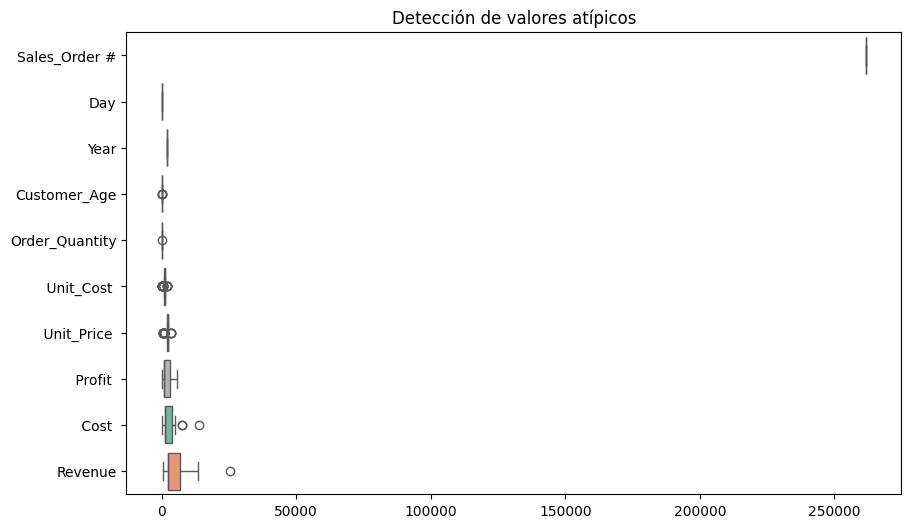


Valores atípicos en la columna 'Sales_Order #':
Empty DataFrame
Columns: [Sales_Order #, Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product_Description, Order_Quantity,  Unit_Cost ,  Unit_Price ,  Profit ,  Cost , Revenue]
Index: []

Valores atípicos en la columna 'Day':
Empty DataFrame
Columns: [Sales_Order #, Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product_Description, Order_Quantity,  Unit_Cost ,  Unit_Price ,  Profit ,  Cost , Revenue]
Index: []

Valores atípicos en la columna 'Year':
Empty DataFrame
Columns: [Sales_Order #, Date, Day, Month, Year, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product_Description, Order_Quantity,  Unit_Cost ,  Unit_Price ,  Profit ,  Cost , Revenue]
Index: []

Valores atípicos en la columna 'Customer_Age':
    Sales_Order #       Date  Day     Month  Year  Custo

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
from google.colab import files

# Subir el archivo
uploaded = files.upload()

# Leer el archivo Excel cargado (reemplazar 'Bike_Sales_Outlier_Lab.xlsx' con el nombre correcto si cambia)
file_name = list(uploaded.keys())[0]  # Obtiene el nombre del archivo cargado
data = pd.read_excel(file_name)

# Mostrar los primeros registros del conjunto de datos
print("Primeras filas del dataset:")
print(data.head())

# Descripción estadística para identificar valores atípicos
print("\nDescripción estadística del dataset:")
print(data.describe())

# Paso 2: Visualización de los datos para identificar valores atípicos
# Crear un gráfico de caja (boxplot) para visualizar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h', palette='Set2')
plt.title("Detección de valores atípicos")
plt.show()

# Paso 3: Identificación de valores atípicos
# Definir una función para identificar valores atípicos usando el rango intercuartílico (IQR)
def detectar_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil
    Q3 = df[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar valores fuera de los límites
    outliers = df[(df[column] < limite_inferior) | (df[column] > limite_superior)]
    return outliers

# Aplicar la función a las columnas numéricas del dataset
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\nValores atípicos en la columna '{column}':")
    outliers = detectar_outliers(data, column)
    print(outliers)

# Paso 4: Tratamiento de valores atípicos (opcional)
# Puedes eliminar los valores atípicos identificados si es necesario
data_sin_outliers = data.copy()
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    data_sin_outliers = data_sin_outliers[
        (data_sin_outliers[column] >= limite_inferior) & (data_sin_outliers[column] <= limite_superior)
    ]

print("\nDatos después de eliminar valores atípicos:")
print(data_sin_outliers.describe())


## Parte 2 DESARROLLO EN PYTHON
### Ejercicio 1
2. Ejercicio de práctica 2.
Deberás realizar el código y visualización correspondiente al escenario, dar una breve
interpretación de los datos.
1. Comparación de calificaciones de estudiantes en diferentes asignaturas
Se quiere comparar las calificaciones promedio de los estudiantes en distintas materias
para detectar diferencias de rendimiento.
• asignaturas =Matemáticas,Ciencias,Historia,Inglés,Arte
• calificaciones = 85, 90, 78, 88, 92
- Código:
- Interpretación:

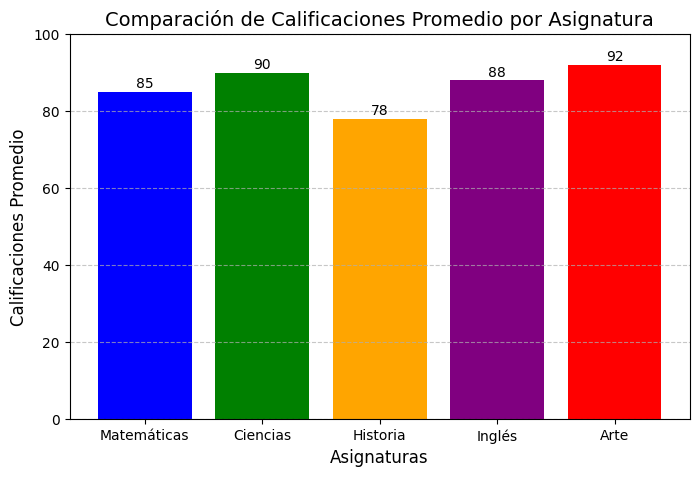

In [1]:
import matplotlib.pyplot as plt

# Datos proporcionados
asignaturas = ["Matemáticas", "Ciencias", "Historia", "Inglés", "Arte"]
calificaciones = [85, 90, 78, 88, 92]

# Crear la visualización de comparación
plt.figure(figsize=(8, 5))
plt.bar(asignaturas, calificaciones, color=['blue', 'green', 'orange', 'purple', 'red'])

# Personalizar el gráfico
plt.title("Comparación de Calificaciones Promedio por Asignatura", fontsize=14)
plt.xlabel("Asignaturas", fontsize=12)
plt.ylabel("Calificaciones Promedio", fontsize=12)
plt.ylim(0, 100)  # Establecer el rango de las calificaciones
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar los valores encima de las barras
for i, calificacion in enumerate(calificaciones):
    plt.text(i, calificacion + 1, str(calificacion), ha='center', fontsize=10)

# Mostrar el gráfico
plt.show()


### Interpretación de los datos

* Arte tiene la calificación promedio más alta con 92 puntos, lo que sugiere que los estudiantes tienden a desempeñarse mejor en esta asignatura en comparación con otras.
* Historia tiene la calificación promedio más baja con 78 puntos, indicando un posible desafío o menor rendimiento en esta área.
* Las calificaciones se encuentran en un rango aceptable, todas por encima de 75 puntos, lo cual refleja un desempeño general positivo de los estudiantes.
* Las asignaturas relacionadas con la creatividad (Arte) y las ciencias (Ciencias) destacan con los puntajes más altos, mientras que Historia parece necesitar más atención para mejorar el rendimiento.

## Ejercicio 2
Comparación del tiempo de carga de diferentes páginas web
Se quiere visualizar el tiempo promedio de carga de diferentes sitios web para
identificar cuál es más rápido o lento.
• sitios = Sitio A, Sitio B,Sitio C,Sitio D,Sitio E
• tiempos = 1.2, 2.5, 0.9, 3.0, 1.8
- Código:
- Interpretación:

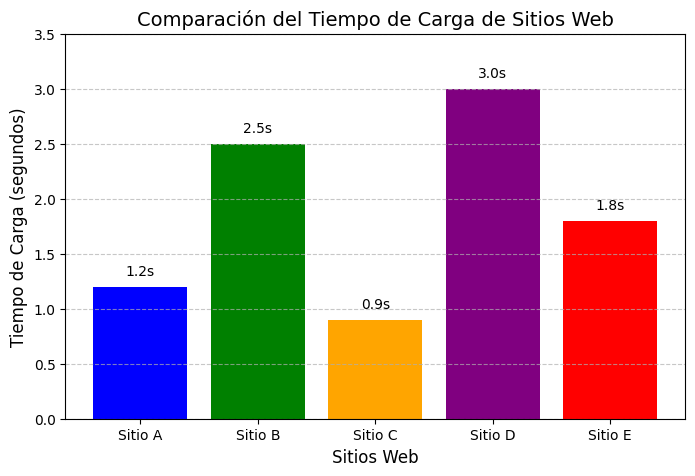

In [2]:
import matplotlib.pyplot as plt

# Datos proporcionados
sitios = ["Sitio A", "Sitio B", "Sitio C", "Sitio D", "Sitio E"]
tiempos = [1.2, 2.5, 0.9, 3.0, 1.8]

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(sitios, tiempos, color=['blue', 'green', 'orange', 'purple', 'red'])

# Personalizar el gráfico
plt.title("Comparación del Tiempo de Carga de Sitios Web", fontsize=14)
plt.xlabel("Sitios Web", fontsize=12)
plt.ylabel("Tiempo de Carga (segundos)", fontsize=12)
plt.ylim(0, 3.5)  # Establecer el rango para los tiempos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar los valores encima de las barras
for i, tiempo in enumerate(tiempos):
    plt.text(i, tiempo + 0.1, f"{tiempo:.1f}s", ha='center', fontsize=10)

# Mostrar el gráfico
plt.show()


### Interpretación de los datos
* Sitio C tiene el tiempo de carga más rápido con 0.9 segundos, lo que indica que es el sitio más optimizado y eficiente en términos de tiempo de respuesta.
* Sitio D es el más lento, con un tiempo de carga promedio de 3.0 segundos, lo que podría impactar negativamente la experiencia del usuario.
* El tiempo de carga promedio de todos los sitios se encuentra entre 0.9 y 3.0 segundos. Mientras que algunos sitios, como el Sitio C y Sitio A, tienen tiempos de carga rápidos, otros como Sitio B, Sitio D y Sitio E podrían necesitar optimización.
* Los sitios con tiempos de carga mayores a 2 segundos (Sitio B, Sitio D y Sitio E) podrían afectar negativamente el rendimiento SEO y la experiencia del usuario, ya que los tiempos prolongados de carga suelen correlacionarse con tasas de rebote más altas.